In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
filename="petitechevre_1201_1209.csv"
df = pd.read_csv(filename)
df.head(10)

,vhost,clientip,ident,auth,timestamp,verb,request,httpversion,response,bytes,referrer,agent,dt,setnum
0,petitechevre.jp,66.249.66.76,-,-,02/Dec/2024:04:03:56 +0900,GET,/SHOP/200665/227849/list.html,1.1,200,50119,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,1202,4
1,petitechevre.jp,106.131.237.177,-,-,02/Dec/2024:04:18:41 +0900,GET,/favicon.ico,1.1,404,196,https://websearch.rakuten.co.jp/,Mozilla/5.0 (Linux; Android 12; SCV48 Build/SP...,1202,4
2,petitechevre.jp,60.61.205.191,-,-,02/Dec/2024:04:20:47 +0900,GET,/hpgen/HPB/theme/css/slick.css,1.1,200,1819,https://petitechevre.jp/SHOP/item-2021-00113.html,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,1202,4
3,petitechevre.jp,60.61.205.191,-,-,02/Dec/2024:04:20:47 +0900,GET,/SHOP/js/jquery-ui-1.10.3.min.js,1.1,200,228138,https://petitechevre.jp/SHOP/item-2021-00113.html,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,1202,4
4,petitechevre.jp,60.61.205.191,-,-,02/Dec/2024:04:20:47 +0900,GET,/pic-labo/mimg/header_logo_sp.png,1.1,200,2985,https://petitechevre.jp/SHOP/item-2021-00113.html,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,1202,4
5,petitechevre.jp,60.61.205.191,-,-,02/Dec/2024:04:20:47 +0900,GET,/pic-labo/cart.png,1.1,200,906,https://petitechevre.jp/SHOP/item-2021-00113.html,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,1202,4
6,petitechevre.jp,60.61.205.191,-,-,02/Dec/2024:04:20:47 +0900,GET,/pic-labo/timg/X_logo.png,1.1,200,1273,https://petitechevre.jp/SHOP/item-2021-00113.html,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,1202,4
7,petitechevre.jp,60.61.205.191,-,-,02/Dec/2024:04:20:48 +0900,GET,/SHOP/img/thum_prev.png,1.1,200,43587,https://petitechevre.jp/SHOP/item-2021-00113.html,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,1202,4
8,petitechevre.jp,60.61.205.191,-,-,02/Dec/2024:04:20:48 +0900,GET,/hpgen/HPB/theme/img/icon_new.png,1.1,200,1257,https://petitechevre.jp/SHOP/item-2021-00113.html,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,1202,4
9,petitechevre.jp,60.61.205.191,-,-,02/Dec/2024:04:20:48 +0900,GET,/SHOP/img/responsive1/icon_freeze.gif,1.1,200,619,https://petitechevre.jp/SHOP/item-2021-00113.html,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,1202,4


In [41]:
df['timestamp'] = df['timestamp'].str.replace('2024:', '2024 ').apply(lambda x: pd.to_datetime(x))

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252945 entries, 0 to 252944
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   vhost        252945 non-null  object 
 1   clientip     252945 non-null  object 
 2   ident        252945 non-null  object 
 3   auth         252945 non-null  object 
 4   timestamp    252945 non-null  object 
 5   verb         252945 non-null  object 
 6   request      252945 non-null  object 
 7   httpversion  252945 non-null  float64
 8   response     252945 non-null  int64  
 9   bytes        252945 non-null  object 
 10  referrer     252940 non-null  object 
 11  agent        252945 non-null  object 
 12  dt           252945 non-null  int64  
 13  setnum       252945 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 27.0+ MB


### Questions
1. Graph of requests daily
2. Requests from bot daily graph
3. Top 10 clientip
4. Top 10 request site
5. Not 200 responses graph daily
6. Requests hourly graph for one ip
7. Requests from bot daily graph

<Axes: xlabel='day', ylabel='request'>

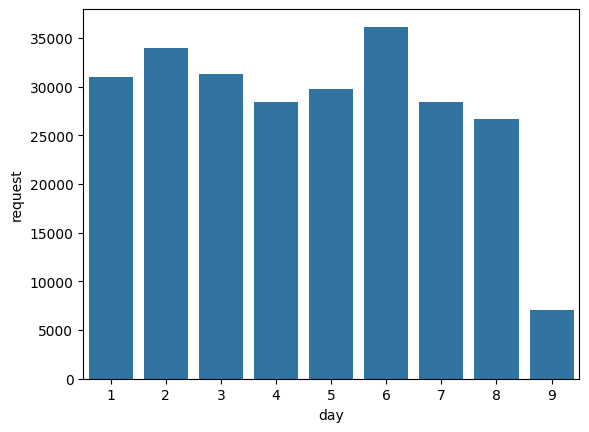

In [56]:
# 1. Graph of requests daily
df['day'] = pd.DatetimeIndex(df['timestamp']).day
# df[['day','request']].groupby('day').count()
sns.barplot(df[['day','request']].groupby('day').count(), x="day", y="request", errorbar=None)

<Axes: xlabel='day', ylabel='request'>

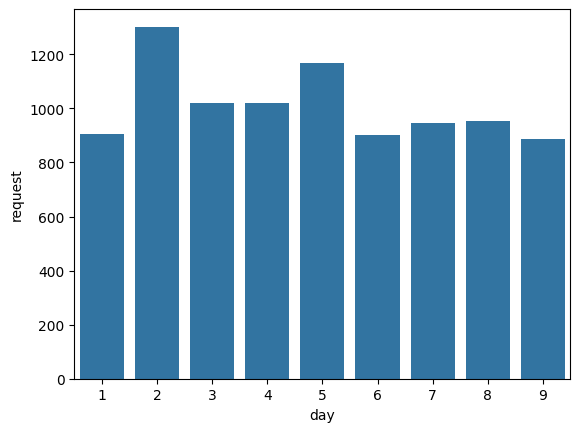

In [60]:
# 2. Requests from bot daily graph
df2 = df[(df['agent'].str.contains("bot"))]
sns.barplot(df2[['day','request']].groupby('day').count(), x="day", y="request", errorbar=None)

In [66]:
# 3. Top 10 clientip and line graph of request per day
df.groupby('clientip').count()['request'].sort_values().tail(10)

clientip
115.65.20.119       731
111.109.66.59       747
126.88.181.11       795
221.118.87.67       809
118.104.85.202      832
101.142.232.21      856
219.106.244.122     927
124.45.158.138      941
114.164.246.154    1095
153.170.37.4       1644
Name: request, dtype: int64